# OSMNX learning
Maybe an easier method than using Overpy because it natively creates geodataframes

In [114]:
import pandas as pd
import json
import numpy as np
import geopandas as gpd
import contextily as cx
import geopy.distance
from shapely.geometry import MultiPolygon, Polygon, Point, LineString
import osmnx as ox
import pyproj
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import patches

%matplotlib inline

'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}'

In [12]:
# Load nation lakes coords   
with open("nation_lakes.json") as f:
    lakes = json.load(f)
print("\nlakes:")
for i,lake in enumerate(lakes):
    print(i,lake["name"])


lakes:
0 Tsayta Lake
1 Indata Lake
2 Tchentlo Lake
3 Chuchi Lake


In [50]:
place = lakes[2]
place_name = place["name"].replace(" ", "-")
print(place["name"])

with open("osm_tags.json") as f:
    desired_tags = json.load(f)
print(json.dumps(desired_tags, indent=2))

Tchentlo Lake
{
  "leisure": [
    "park",
    "nature_reserve"
  ],
  "tourism": [
    "camp_site"
  ],
  "highway": [
    "motorway",
    "trunk",
    "primary",
    "secondary",
    "tertiary",
    "unclassified",
    "track",
    "road",
    "path",
    "footway"
  ],
  "water": [
    "lake",
    "river"
  ]
}


In [14]:
gdf = ox.features.features_from_bbox(place["north"], place["south"], place["east"], place["west"], desired_tags)
gdf = gdf.to_crs(epsg=3857) # project to spherical mercator to match tiles
gdf.reset_index(inplace=True)
cols_to_keep = ['element_type', 'geometry', 'name'] + [key for key in desired_tags.keys() if key in gdf.columns]
gdf = gdf[cols_to_keep]
gdf

,element_type,geometry,name,leisure,tourism,highway,water
0,node,POINT (-13927251.135 7397750.565),NaN,NaN,camp_site,NaN,NaN
1,node,POINT (-13893037.802 7401149.038),Ahdatay,NaN,camp_site,NaN,NaN
2,node,POINT (-13897530.267 7405154.215),Ahdatay Creek Provincial Site,NaN,camp_site,NaN,NaN
3,node,POINT (-13902276.529 7402844.979),Miner's Camp,NaN,camp_site,NaN,NaN
4,node,POINT (-13903632.690 7405950.229),NaN,NaN,camp_site,NaN,NaN
5,node,POINT (-13905395.523 7404803.671),Pine Point,NaN,camp_site,NaN,NaN
6,node,POINT (-13909000.004 7403426.024),NaN,NaN,camp_site,NaN,NaN
7,node,POINT (-13911881.920 7399091.207),NaN,NaN,camp_site,NaN,NaN
8,node,POINT (-13921971.006 7400055.029),NaN,NaN,camp_site,NaN,NaN
9,node,POINT (-13929125.632 7397623.363),Progress Point,NaN,camp_site,NaN,NaN


In [15]:
elements = gdf.to_dict(orient = "records")

In [16]:
api_key="87e81a5a-4136-409e-92dd-10c6a1a3cb9d"

# Get background tiles

In [125]:
def lonlat_to_xy(lon: float, lat: float):
    """Converts coordinates from EPSG4326 (lon,lat) to EPSG3857(x,y)"""
    proj = pyproj.Transformer.from_crs(4326, 3857, always_xy=True)
    return proj.transform(lon,lat)

def xy_to_lonlat(x: float,y: float):
    """Converts coordinates from EPSG3857(x,y) to EPSG4326 (lon,lat)"""
    proj = pyproj.Transformer.from_crs(3857, 4326, always_xy=True)
    return proj.transform(x,y)

def xy_to_fig(x: float, y: float, x_min: float, x_max: float, y_min: float, y_max: float):
    """Converts coordinates from EPSG3857(x,y) to figure coordinates (x,y):[0.0,1.0]"""
    x_fig = (x - x_min)/(x_max - x_min)
    y_fig = (y - y_min)/(y_max - y_min)
    return x_fig, y_fig

def fig_to_xy(x_fig: float, y_fig: float, x_min: float, x_max: float, y_min: float, y_max: float):
    """Converts from figure coordinates (x,y):[0.0,1.0], to EPSG3857(x,y) to """
    x = x_fig * (x_max - x_min) + x_min
    y = y_fig * (y_max - y_min) + y_min
    return x,y

In [134]:
 fig_to_xy(0.5, 0.9, x_min, x_max, y_min, y_max)

(-13917601.947098102, 7413661.593823781)

In [126]:
west,east,south,north = place["west"], place["east"], place["south"], place["north"]
zoom_level = cx.tile._calculate_zoom(west,south,east,north) + 1  


STAMEN_API_KEY = os.environ["STAMEN_API_KEY"]
with open("tiles.json") as f:
    tiles = json.load(f)
tiles_source = tiles["StamenTonerLite"].replace("API_KEY", STAMEN_API_KEY)
# tiles_source = tiles["StamenTerrain"].replace("API_KEY", STAMEN_API_KEY)
img, ext = cx.bounds2raster(west,south, east, north, f"cache/{place_name}.tif", zoom_level, source=tiles_source, ll=True)


In [127]:
# tiles

In [128]:
def calculate_plot_dimensions(plot_max_dim: float, dx: float, dy: float):
    """Caluclates figure dimensions (inches) to be used to create Matplotlib Figure
    PARAMETERS:
        max_dim: maximum height or width desired for figure (inches)
        dx:      range of data's x dimension
        dy:      range of data's y dimension
    RETURNS:
        tuple:   (width, height) in inches
    """
    if dx >= dy:
        plot_width_in = plot_max_dim
        plot_height_in = plot_width_in * dy / dx
    else:
        plot_height_in = plot_max_dim
        plot_width_in = plot_height_in * dx / dy

    return (plot_width_in, plot_height_in)

def extract_coords(geom):
    """Extracts a list of coordinates ((x,y) tuples) for the geometry
    PARAMETERS:
        geom(Shapely Geometry object): contains one or many geometries
    RETURNS:
        list: each item is itself a list of coordinate tuples, eg[[(x1,y1),(x2,y2)...],[(x1,y1),(x2,y2)...], ....]]
    """
    coords = []
    
    if geom.geom_type in ["Point", "LineString"]:
        coords.append(geom.coords[:])
    elif geom.geom_type == "Polygon":
        polygon_coords = extract_polygon_coords(geom)
        # print(f"polygon coords: {len(polygon_coords)}")
        coords.extend(polygon_coords)
    elif geom.geom_type == "MultiPolygon":
        polygons = [polygon for polygon in geom.geoms]
        for polygon in polygons:
            coords.extend(extract_polygon_coords(polygon))
    return coords

def extract_polygon_coords(polygon):
    """Extracts a list of coordinates ((x,y) tuples) for exterior and interiors of Shapely Polygon
    PARAMETERS:
        geom: Shapely Polygon object
    RETURNS:  
        list: each item is itself a list of coordinate tuples, eg[[(x1,y1),(x2,y2)...],[(x1,y1),(x2,y2)...], ....]]
    """
    coords = []
    if polygon.geom_type == 'Polygon':
        coords.append(polygon.exterior.coords[:])
        for interior in polygon.interiors:
            coords.append(interior.coords[:])
    else:
        raise ValueError('Unhandled geometry type: ' + repr(geom.geom_type))
    return coords


def get_style(element: dict, tag_styles: dict, styles: dict):
    """Extracts a list of coordinates ((x,y) tuples) for exterior and interiors of Shapely Polygon
    PARAMETERS:
        element:     contains OSM tags (key:value) for specific element (node,way, or relation)
        tag_styles:  links OSM tags to the style settings contained in `style`
        styles:      style settings used by matplotlib for lines and markers
    RETURNS:  
        list: dict with kwargs to be used by ax.plot()
    """
    style = {}
    for key,value in element.items():
        if key in tag_styles:
            if value in tag_styles[key]:
                style = styles[tag_styles[key][value]]
    return style

In [129]:
# convert to EPSG3857
x_min, y_min = lonlat_to_xy(west, south)
x_max, y_max = lonlat_to_xy(east, north) 
dy = y_max - y_min
dx = x_max - x_min


plot_dim = 10
figsize = calculate_plot_dimensions(plot_dim, dx, dy)
figsize

(10, 3.742437339966413)

In [130]:
node_marker_size = plot_dim * 0.5
annotation_text_size = plot_dim * 0.5
thick_line_width = plot_dim * 0.1
med_line_width = plot_dim * 0.05
thin_line_width = plot_dim * 0.025


styles = {
    "main_road": {"color":"gray", "linewidth":thick_line_width},
    "secondary_road": {"color":"gray", "linewidth":med_line_width},
    "tertiary_road": {"color":"gray", "linewidth":thin_line_width},
    "trail":{"color":"gray", "linewidth":thin_line_width, "linestyle": "--"},
    "campsite": {"marker": "o", "ms": node_marker_size, "mew":0.5, "mfc":"none", "mec":"green", "alpha": 0.9, "linestyle": "",},
    "lake": {"color":"blue", "linewidth":thin_line_width, "alpha": 0.8},
    "river": {"color":"blue", "linewidth":thin_line_width, "alpha": 0.5},
    # "barrier": {"marker": "x", "ms": node_marker_size*0.5, "color":"black", "alpha": 0.75, "linestyle": ""},
    "mountain": {"marker": "+", "ms": node_marker_size*0.5, "color":"black", "mew":0.5, "mfc":"none","linestyle": ""},
    "attraction": {"marker": "*", "ms": node_marker_size*0.5, "mfc":"none", "mec":"blue", "alpha": 0.5, "linestyle": ""},
    "park": {"color":"green", "linewidth":thick_line_width, "linestyle": ":", "alpha":0.5},
    # "scale_bar": {"color":"grey", "linewidth":thick_line_width*2, "linestyle": "-", "alpha":0.5}
    
}

In [131]:
tag_styles = {
    "tourism": {
        "camp_site": "campsite"
    },
    "natural": {
        "peak": "mountain",
        "mountain_range": "mountain",
        "spring": "attraction",
    },
    "barrier": {
        "yes": "barrier",
    },
    "water": {
        "lake": "lake",
        "river": "river",
    },
    'highway': {
        "motorway": "secondary_road",
        "trunk":  "secondary_road",
        "primary": "secondary_road",
        "secondary": "tertiary_road",
        "tertiary": "tertiary_road",
        "unclassified": "tertiary_road",
        "track": "tertiary_road",
        "road": "tertiary_road",
        "path": "trail",
        "footway": "trail",
    },
    'leisure': {
        "nature_reserve": "park",
        "park": "park",
    },
}

In [132]:
def add_legend(ax: matplotlib.axes._axes.Axes, text_size: float, legend_items: dict, loc: tuple=(0,0)):
    """Adds legend to map
    PARAMETERS:
        ax:           axis to draw lengend onto
        text_size:    size of legend text  
        legend_items: dict with keys=text, values=dict containing matplolib style kwargs for symbol
        loc:          location to place legend in figure corrdinates (0.0-1.0), default=(0,0) (lower left)
    RETURNS:
        matplotlib axis object now with legend
    """
    legend = ax.legend(
        handles=[Line2D([0], [0], label=l.capitalize().replace("_", " "), **styles[l]) for l in legend_items], 
        title = " Legend", 
        alignment='left', # position of legend title
        title_fontsize = text_size + 1, # make title a little bigger than text
        loc=loc,          # location of legend on map
        fontsize=text_size,
        borderpad=1.5,
        framealpha=1      # make legend box opaque
    ) 
    return ax

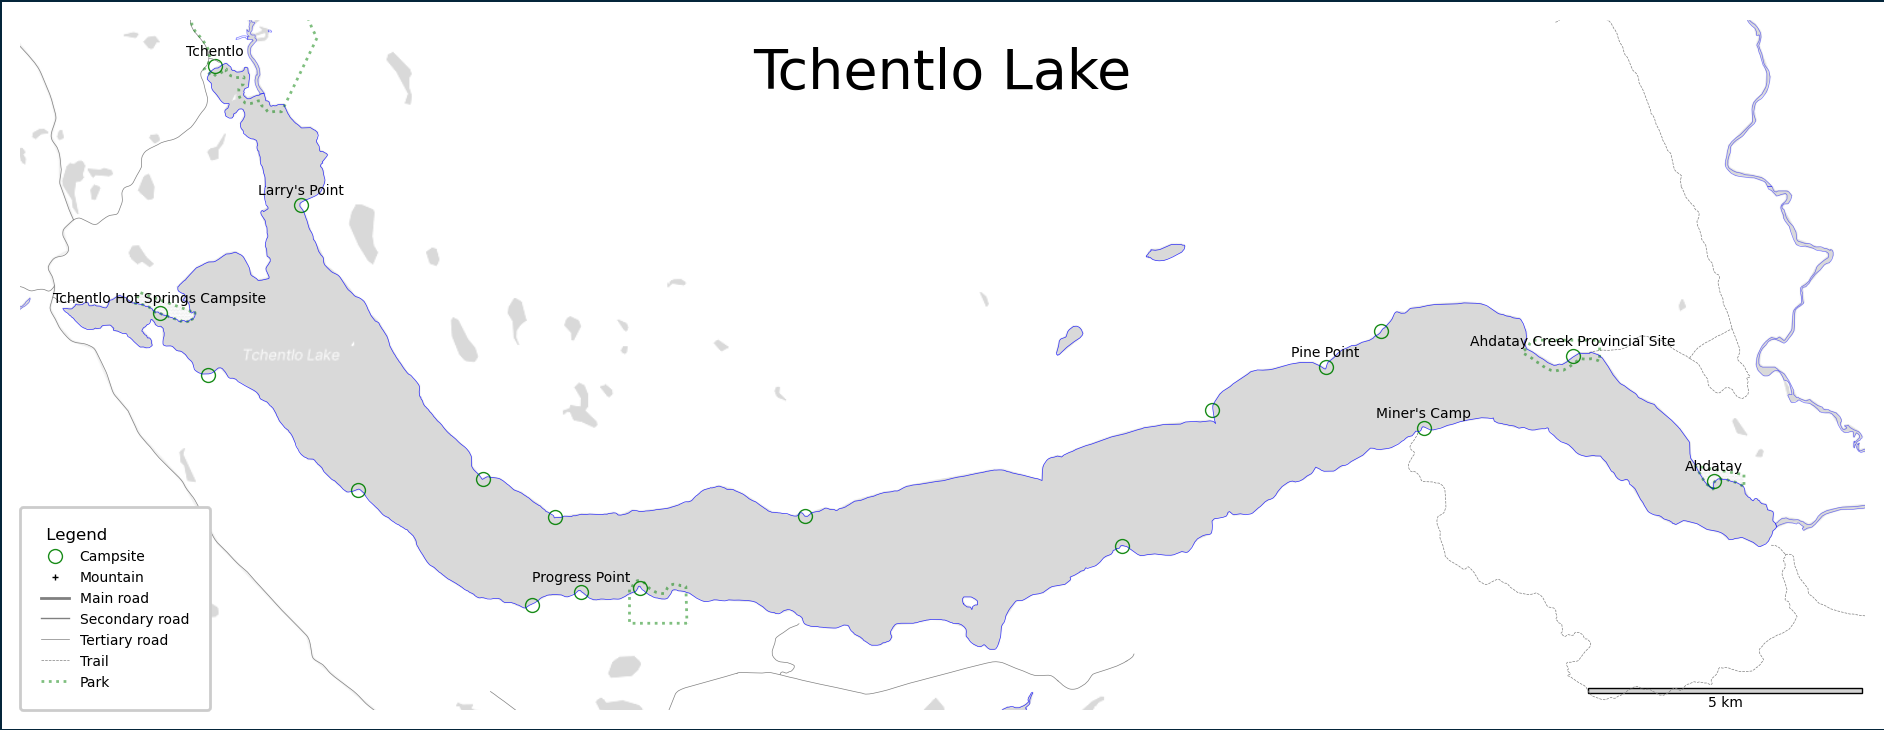

In [136]:
# make fig with backgound tiles
fig,ax = plt.subplots(1, figsize=figsize,linewidth=1, edgecolor="#04253a")
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))
fig.set_dpi(200)
ax.set_axis_off() # don't display axes with coordinates

cx.add_basemap(ax, source = tiles_source, zoom=zoom_level);

# Plot features from OSM
for element in elements:
    # get coordinates to plot for this element
    element_type = element["element_type"]
    coords_list = extract_coords(element["geometry"])
    for coords in coords_list:
        x,y = zip(*coords)
        ax.plot(x,y,**get_style(element, tag_styles, styles))
    if (element_type == "node" and type(element["name"])!=float):
        ax.annotate(element["name"], (x[0],y[0]), 
                    size=annotation_text_size, 
                    xycoords='data', 
                    xytext=(0, node_marker_size*0.75), 
                    textcoords='offset points', 
                    ha='center');
# Add legend
legend_items = ["campsite", "mountain", "main_road", "secondary_road", "tertiary_road", "trail", "park"]
legend_loc = (0.,0)
ax = add_legend(ax, annotation_text_size, legend_items, legend_loc)

# Add distance scale bar
scale_width_pct = 0.15
scale_anchor_fig_x = 1-scale_width_pct
scale_anchor_fig_y = 0.025
scale_anchor_xy = fig_to_xy(scale_anchor_fig_x, scale_anchor_fig_y,x_min,x_max,y_min,y_max)

ax = add_scale_bar(ax, scale_width_pct, scale_anchor_xy, west, east, south, north)

# Add map title
ax.annotate(place["name"], fig_to_xy(0.5, 0.9, x_min, x_max, y_min, y_max), ha='center', va = "baseline", size=annotation_text_size*4);
plt.tight_layout(pad=1)
plt.savefig(f'maps/{place_name}.png') 

In [144]:
def get_scale_dimesion_km(plot_width_km: float, max_width_pct: float):
    """Determines the size (in kilomaters) that scale bar will represent on the map
    Only rounded values starting with 1,2,5 (multiplied by 10**x) allowed
    PARAMETERS:
        plot_width_km:    distance in kilometers represented by the width of the map
        max_width_pct:    the maximum size of scale bar as fraction of map width  
    RETURNS:
        int:    the number of km that scale bar will represent on the map
    """
    scale_dimesions = [0.1,0.2,0.5,1,2,5,10,20,50,100,200,500] # hard-coded values for typical canoe trips
    max_scale_dimension = plot_width_km * max_width_pct
    for scale_dimesion in scale_dimesions[::-1]:
        if scale_dimesion <= max_scale_dimension:
            break
    return scale_dimesion

In [151]:
def add_scale_bar(ax: matplotlib.axes._axes.Axes, max_width_pct: float, 
                  anchor, plot_width_km, dx:float, dy:float) -> matplotlib.axes._axes.Axes:
    """_summary_

    Args:
        ax (matplotlib.axes._axes.Axes): ax containing map
        scale_width_pct (float): _description_
        anchor (_type_): _description_
        plot_width_km (_type_): _description_
        dx (float): _description_
        dy (float): _description_

    Returns:
        matplotlib.axes._axes.Axes: _description_
    """
    # anchor_x, anchor_y = anchor
    scale_dimesion_km = get_scale_dimesion_km(plot_width_km,max_width_pct)
    width = scale_unit / plot_width_km * dx
    
    height = max(dx,dy)*0.0025

    anchor_x, anchor_y = anchor

    # Create a Rectangle patch for scale bar
    
    bar = patches.Rectangle(
        xy=anchor, 
        width = width, 
        height = height, 
        linewidth=0.5,
        edgecolor='black',
        facecolor='lightgrey',
        fill=True
    )
    ax.add_patch(bar)
    
    # Add annotation
    ax.annotate(
        f"{scale_unit} km", 
        xy=(anchor_x + width/2 , anchor_y ), 
        xycoords='data', 
        size=annotation_text_size, 
        xytext = (0,-5),
        textcoords = "offset points",
        ha='center',
    )
    return ax

def get_plot_width_km(west: float,east: float,south: float,north: float) -> float:
    """Calculates the width represented by the map at its center latitude
    Args:
        west (float): longitude of west edge of map
        east (float): longitude of east edge of map
        south (float): latitude of south edge of map
        north (float): latitude of north edge of map
    Returns:
        float: width in km
    """
    lat = (north + south) / 2 # central latitude to minimize errors
    return geopy.distance.geodesic((lat,east), (lat,west)).km

In [154]:
#### Scale bar functions
def get_scale_dimesion_km(plot_width_km: float, max_width_pct: float) -> int:
    """Determines the size (in kilomaters) that scale bar will represent on the map
    Only rounded values starting with 1,2,5 (multiplied by 10**x) allowed
    Args:
        plot_width_km (float): distance in kilometers represented by the width of the map
        max_width_pct (float): the maximum size of scale bar as fraction of map width  

    Returns:
        int: the number of km that scale bar will represent on the map
    """
    scale_dimesions = [0.1,0.2,0.5,1,2,5,10,20,50,100,200,500] # hard-coded values typical for canoe trips
    max_scale_dimension = plot_width_km * max_width_pct
    for scale_dimesion in scale_dimesions[::-1]:
        if scale_dimesion <= max_scale_dimension:
            break
    return scale_dimesion

def get_plot_width_km(west: float,east: float,south: float,north: float) -> float:
    """Calculates the width represented by the map at its center latitude
    Args:
        west (float): longitude of west edge of map
        east (float): longitude of east edge of map
        south (float): latitude of south edge of map
        north (float): latitude of north edge of map
    Returns:
        float: width in km
    """
    lat = (north + south) / 2 # central latitude to minimize errors
    return geopy.distance.geodesic((lat,east), (lat,west)).km


def add_scale_bar(ax: matplotlib.axes._axes.Axes, max_width_pct: float, 
                  anchor: tuple, plot_width_km, dx:float, dy:float,
                  text_size: float) -> matplotlib.axes._axes.Axes:
    """Adds horizontal bar indicating distance scale on map in kilometers
    Args:
        ax (matplotlib.axes._axes.Axes): ax containing map
        max_width_pct (float): the maximum size of scale bar as fraction of map width
        anchor (tuple): (x,y) coordinates for lower left corner of scale bar (in data coordinates)
        plot_width_km (_type_): distance represented by map width (in km)
        dx (float): width of map in data coordinates
        dy (float): height of map in data coordinates
        text_size (float): 
    Returns:
        matplotlib.axes._axes.Axes: ax with scale bar on it
    """
    # get height and width of bar in data coordinates
    scale_dimesion_km = get_scale_dimesion_km(plot_width_km,max_width_pct)
    width = scale_dimesion_km / plot_width_km * dx 
    height = max(dx,dy)*0.0025 

    anchor_x, anchor_y = anchor # unpack anchor point into x,y in data

    # Create a Rectangle patch for scale bar
    bar = patches.Rectangle(
        xy=anchor, 
        width = width, 
        height = height, 
        linewidth=0.5,
        edgecolor='black',
        facecolor='lightgrey',
        fill=True
    )
    ax.add_patch(bar)
    
    # Add annotation
    ax.annotate(
        f"{scale_dimesion_km} km", 
        xy=(anchor_x + width/2 , anchor_y), 
        xycoords='data', 
        size=text_size, 
        xytext = (0,-text_size),
        textcoords = "offset points",
        ha='center',
    )
    return ax


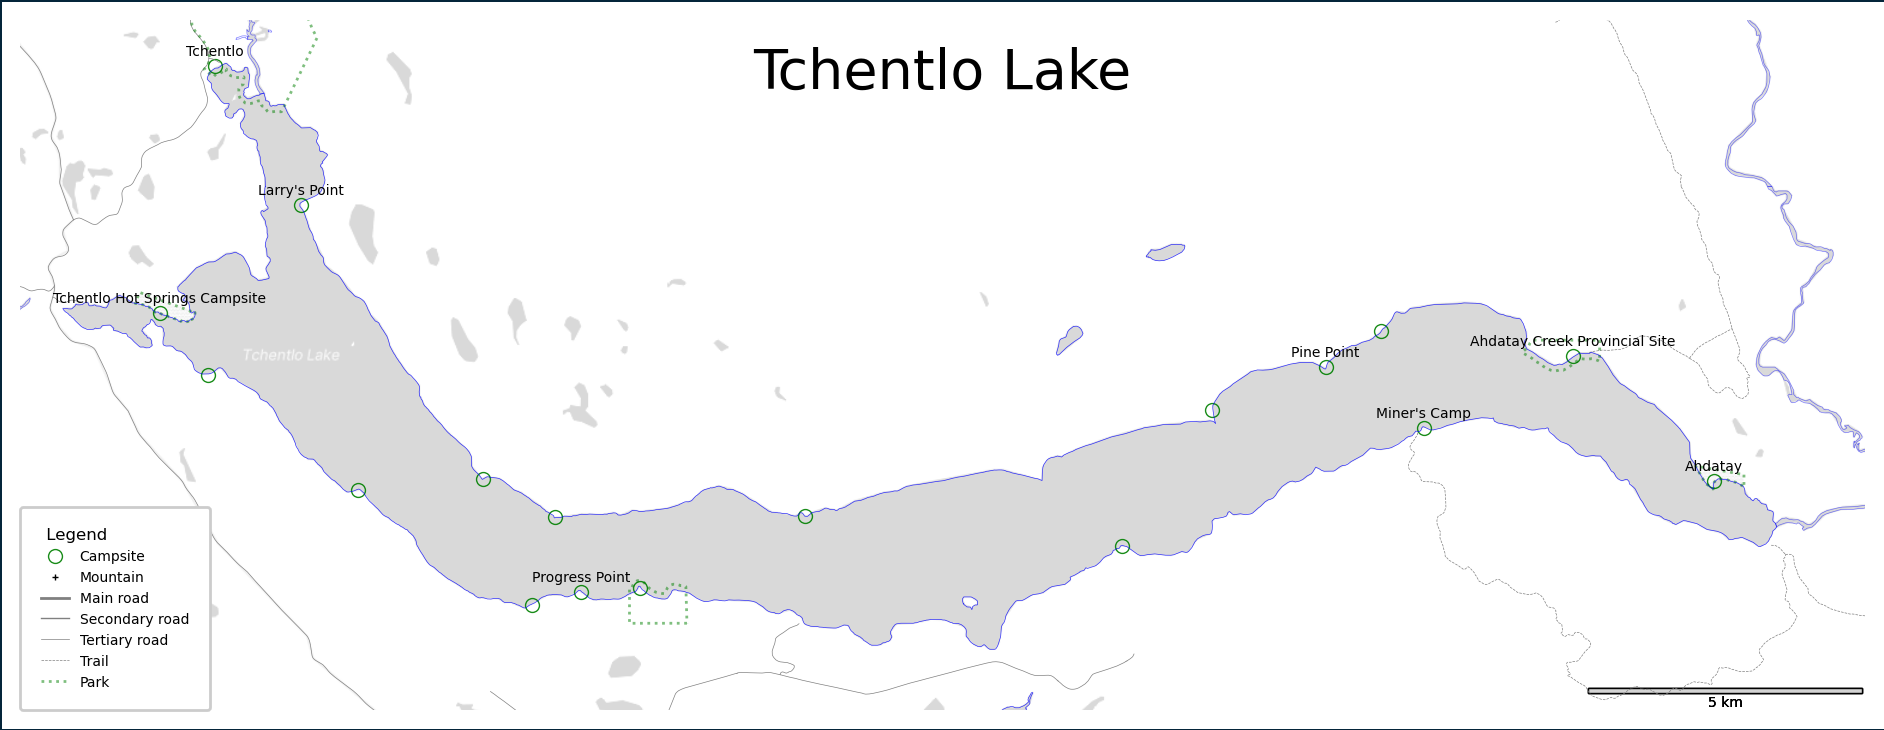

In [157]:
scale_width_pct = 0.15

scale_anchor_x_fig = 1-scale_width_pct
scale_anchor_y_fig = 0.025
plot_width_km = get_plot_width_km(west,east,south,north)
scale_anchor_xy = fig_to_xy(scale_anchor_x_fig, scale_anchor_y_fig, west, east, south, north)

ax = add_scale_bar(ax, scale_width_pct, scale_anchor_xy, plot_width_km, dx, dy, annotation_text_size)
fig

In [421]:
legend_loc

(0.0, 0)

scale_unit = 2km


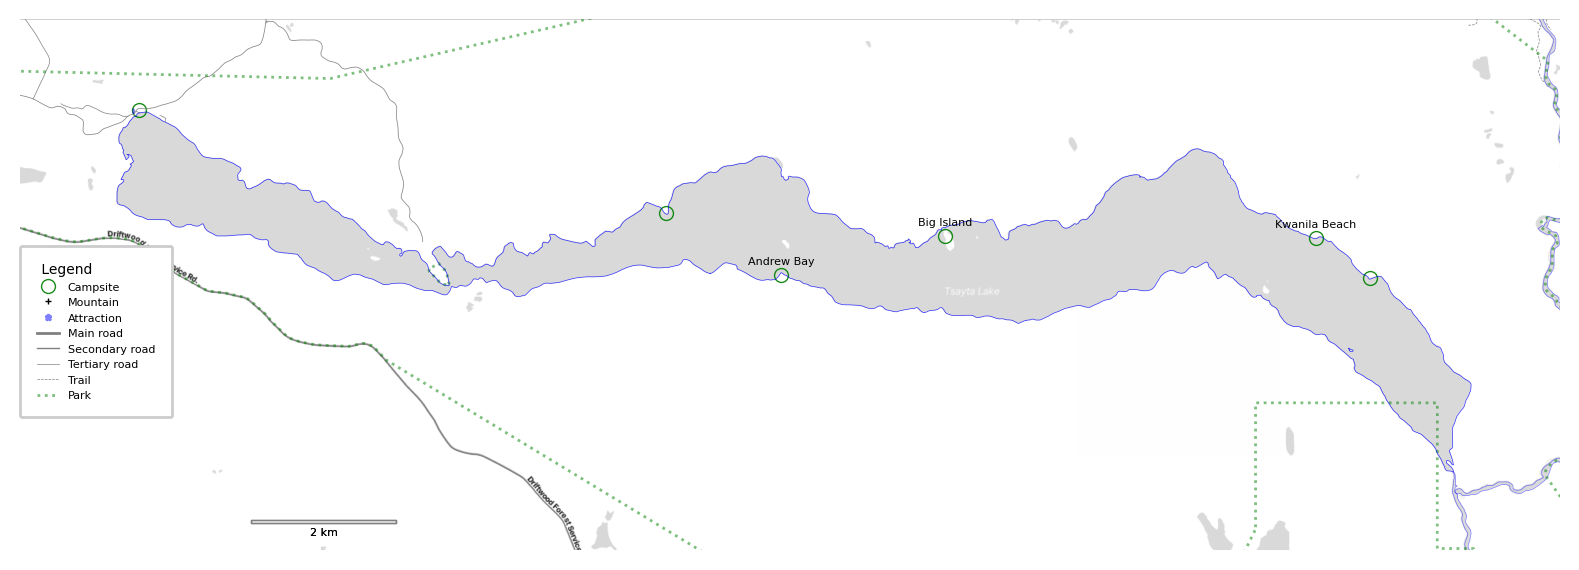

In [273]:
scale_width_pct = 0.22 # maximum width of the scale bar as % of map

plot_width_km = geopy.distance.geodesic((south,east), (south,west)).km
scale_unit = get_scale_unit(plot_width_km,scale_width_pct)
print(f"scale_unit = {scale_unit}km")
scale_unit_pct = scale_unit / plot_width_km

scale_width = scale_unit_pct * dx
scale_height = max(dx,dy)*0.0025

scale_anchor_x = x_min + 0.15 * dx 
scale_anchor_y = y_min + 0.05 * dy

# Create a Rectangle patch for scale bar
bar = patches.Rectangle(
    xy=(scale_anchor_x,scale_anchor_y), 
    width = scale_width, 
    height=scale_height, 
    linewidth=0.5,
    edgecolor='grey',
    facecolor='none',
    # color = "grey"
)
ax.add_patch(bar)

# Add annotation
ax.annotate(
    f"{scale_unit} km", 
    xy=(scale_anchor_x + scale_width/2 , scale_anchor_y - 3*scale_height), 
    size=annotation_text_size, 
    xycoords='data', 
    ha='center',
    color="black"
)
fig

In [361]:
x_min, y_max

(-13946987.63854772, 7415861.076002616)

In [362]:
x,y = ax.transLimits.transform((x_min, y_max))
x,y

(0.0, 1.0)

In [363]:
ax.transData.inverted().transform((x,y))

array([-13956719.26363818,   7390762.30005157])

In [25]:
# plt.savefig('figure.png') 
# plt.show()

<Figure size 640x480 with 0 Axes>

In [137]:
east - west



0.3346550293247361

In [138]:
north - south

0.06542549902331984